In [1]:
import seaborn as sns
import pandas as pd
from pathlib import Path

In [2]:
root_dir = Path("../")
data_path = root_dir / "data" / "interim" / "teleco_churn_limpio.csv"

try:
    df = pd.read_csv(data_path)
    print(f"Dimensiones del dataset: {df.shape} (Filas, Columnas)")
except FileNotFoundError:
    print("Error: No se encuentra el archivo.")

Dimensiones del dataset: (7032, 21) (Filas, Columnas)


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<Axes: xlabel='Churn', ylabel='count'>

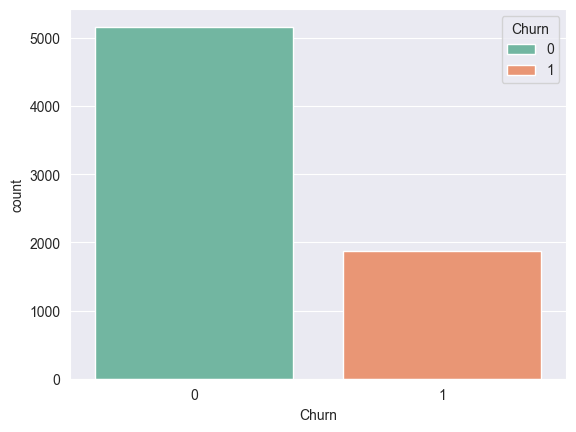

In [4]:
# ¿Tenemos clientes fieles o que se van?
sns.countplot(x='Churn', data=df, hue='Churn',palette='Set2')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

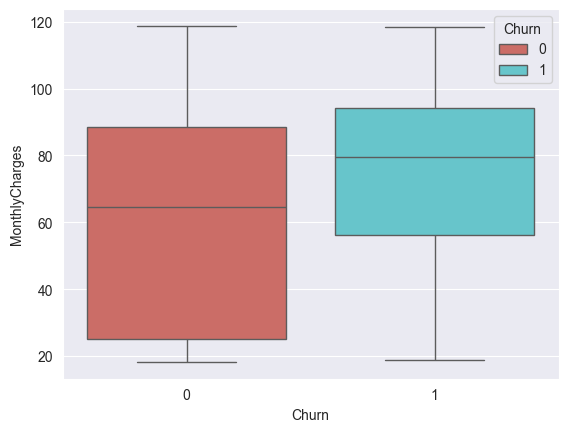

In [5]:
# ¿La caja de los que se van (1) está más arriba que la de los que se quedan (0)?
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn',palette='hls' )

<Axes: >

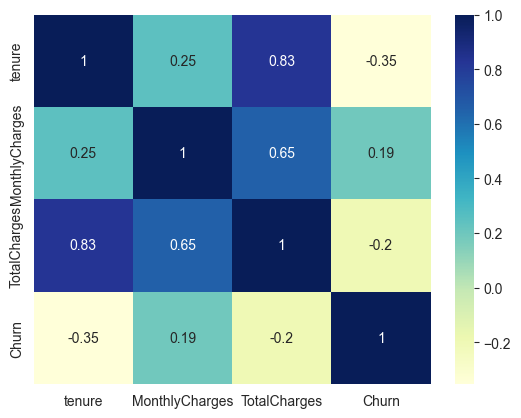

In [6]:
correlacion = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(correlacion, annot=True, cmap="YlGnBu")
